In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Loan Default.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


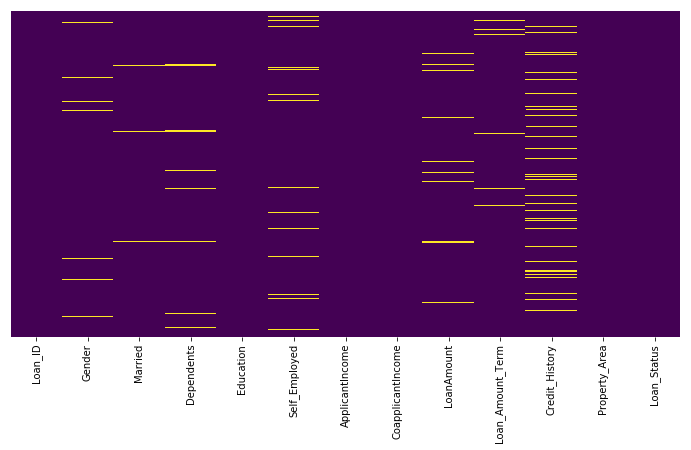

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
# Missing Data Imputation for the categorical variables
mode1 = df['Gender'].mode().values[0]
mode2 = df['Married'].mode().values[0]
mode3 = df['Self_Employed'].mode().values[0]
mode4 = df['Dependents'].mode().values[0]
mode5 = df['Loan_Amount_Term'].mode().values[0]
mode6 = df['Credit_History'].mode().values[0]

df['Gender'] = df['Gender'].replace(np.nan, mode1)
df['Married'] = df['Married'].replace(np.nan, mode2)
df['Self_Employed'] = df['Self_Employed'].replace(np.nan, mode3)
df['Dependents'] = df['Dependents'].replace(np.nan, mode4)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan, mode5)
df['Credit_History'] = df['Credit_History'].replace(np.nan, mode6)

In [10]:
# Missing Data imputation for the Numerical Variable
median  =df['LoanAmount'].median()
df['LoanAmount']  = df['LoanAmount'].replace(np.nan, median)

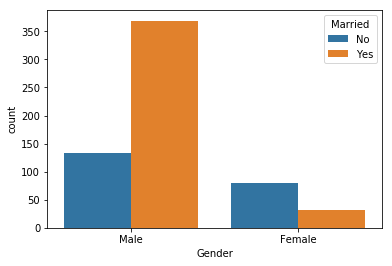

In [11]:
# Doing some explanatory Data Analysis
# UNIVARIATE ANALYSIS
sns.countplot(x='Gender', data=df, hue='Married')

In [12]:
# More men applied for the loan compared to women
# There are more Single women applicants for the loan comapred to married women
# Married men applied more for the loan compared to single men

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

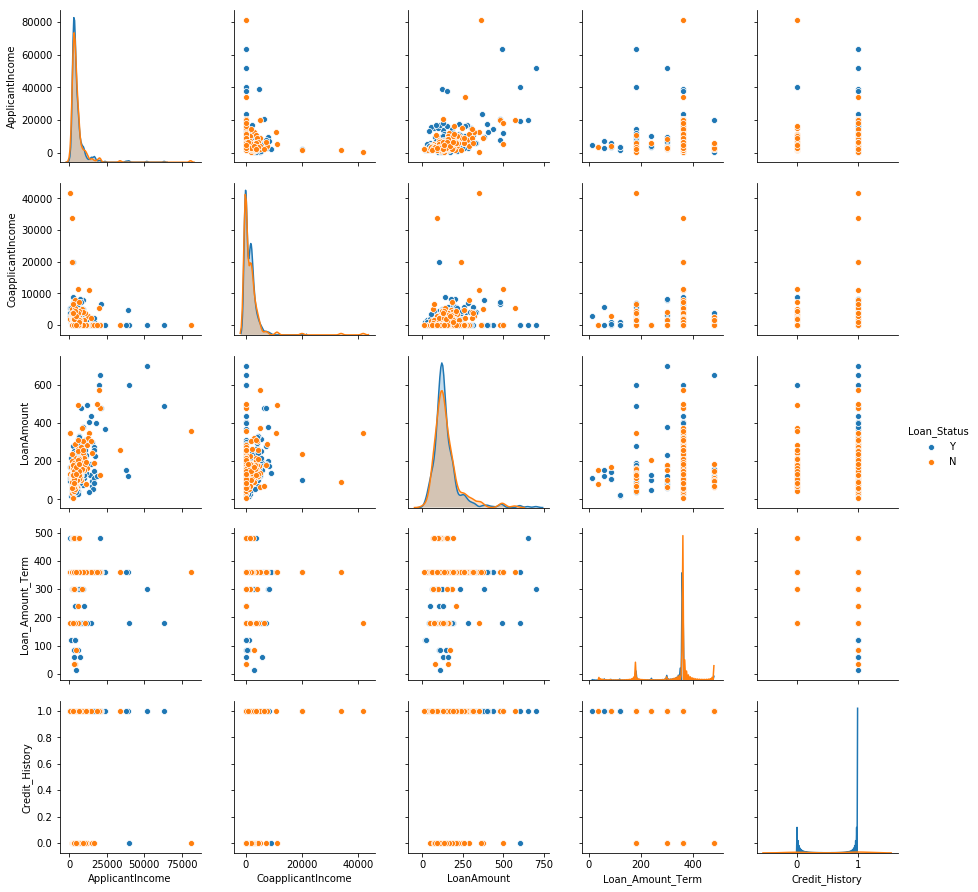

In [14]:
sns.pairplot(df, hue='Loan_Status')

In [15]:
loan_map = {'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(loan_map)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


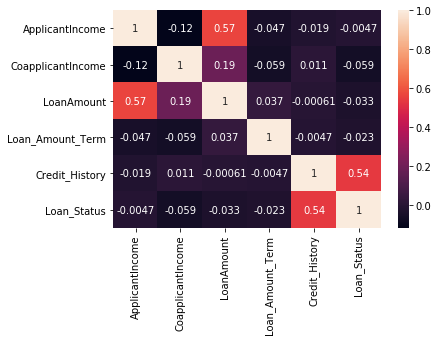

In [17]:
sns.heatmap(df.corr(), annot=True)

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [19]:
init_notebook_mode(connected=True)

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

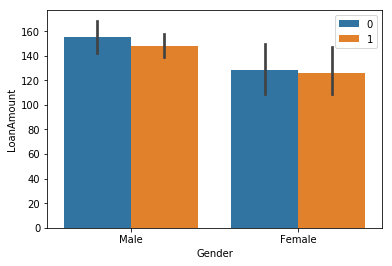

In [22]:
sns.barplot(x='Gender', y='LoanAmount', data=df, hue='Loan_Status')
plt.legend(loc=0)

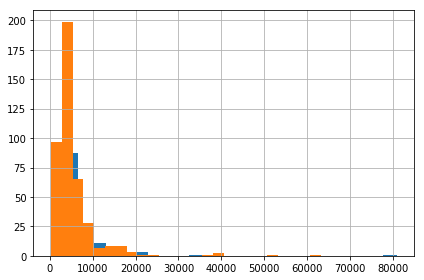

In [23]:
df[df['Loan_Status']==0]['ApplicantIncome'].hist(bins=25)
df[df['Loan_Status']==1]['ApplicantIncome'].hist(bins=25)
plt.tight_layout()

In [24]:
# Feature Engineering
# Gender, Married, Education, self employed, Property area are all cateforical variabkes

In [25]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
married = pd.get_dummies(df['Married'], drop_first=True)
education = pd.get_dummies(df['Education'], drop_first=True)
self_employed = pd.get_dummies(df['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(df['Property_Area'], drop_first=True)

In [26]:
df = pd.concat([df,gender,married,self_employed,education,property_area], axis=1)

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male,Yes,Yes,Not Graduate,Semiurban,Urban
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,1,0,0,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,1,1,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,1,1,1,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,1,1,0,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0,0,0,1


In [28]:
df.drop(['Gender','Married','Education','Self_Employed','Property_Area'], axis=1, inplace=True)

In [29]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Yes,Not Graduate,Semiurban,Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1


In [30]:
# Dropping the Loan ID Since it doesn't relate the objective at hand

In [31]:
df.drop('Loan_ID', axis=1, inplace=True)

In [32]:
dependents = pd.get_dummies(df['Dependents'], drop_first=True)
df = pd.concat([df, dependents], axis=1)

In [33]:
df.drop('Dependents', axis=1, inplace=True)

In [34]:
# Now let's fit it into a machine learning algorithm

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [38]:
logmodel = LogisticRegression()

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
logmodel_pred = logmodel.predict(X_test)

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
dtree_pred = dtree.predict(X_test)

In [44]:
rfc = RandomForestClassifier()

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
gboost = GradientBoostingClassifier()

In [48]:
gboost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
gboost_pred = gboost.predict(X_test)

In [50]:
svm = SVC()

In [51]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
svm_pred = svm.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [54]:
print(classification_report(y_test, gboost_pred))
print('\n')
print(confusion_matrix(y_test, gboost_pred))

             precision    recall  f1-score   support

          0       0.78      0.38      0.52        65
          1       0.74      0.94      0.83       120

avg / total       0.75      0.75      0.72       185



[[ 25  40]
 [  7 113]]


In [55]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [58]:
knn_pred = knn.predict(X_test)

In [59]:
print(classification_report(y_test, knn_pred))

             precision    recall  f1-score   support

          0       0.25      0.12      0.16        65
          1       0.63      0.80      0.70       120

avg / total       0.49      0.56      0.51       185



In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Yes,Not Graduate,Semiurban,Urban,1,2,3+
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,0,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,1,0,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1,0,0,0


In [63]:
print(classification_report(y_test, svm_pred))
print('\n')
print(confusion_matrix(y_test, svm_pred))

             precision    recall  f1-score   support

          0       1.00      0.02      0.03        65
          1       0.65      1.00      0.79       120

avg / total       0.77      0.65      0.52       185



[[  1  64]
 [  0 120]]


In [64]:
acc = [accuracy_score(y_test, logmodel_pred),
      accuracy_score(y_test, dtree_pred),
      accuracy_score(y_test, rfc_pred),
      accuracy_score(y_test, gboost_pred)]

index = ['Logisic Regression',
        'Decision Tree Classifier',
        'Random Forest Classfier',
        'Gradient Boosting Classifier']

In [65]:
acc_matrix = pd.DataFrame(acc, index=index, columns=['Accuracy'])

In [66]:
acc_matrix

,Accuracy
Logisic Regression,0.783784
Decision Tree Classifier,0.702703
Random Forest Classfier,0.767568
Gradient Boosting Classifier,0.745946


In [67]:
rec = [recall_score(y_test, logmodel_pred),
      recall_score(y_test, dtree_pred),
      recall_score(y_test, rfc_pred),
      recall_score(y_test, gboost_pred)]

In [68]:
rec_matrix = pd.DataFrame(rec, index=index, columns=['Recall'])

In [69]:
pre = [precision_score(y_test, logmodel_pred),
      precision_score(y_test, dtree_pred),
      precision_score(y_test, rfc_pred),
      precision_score(y_test, gboost_pred)]

In [70]:
pre_matrix = pd.DataFrame(pre, index=index, columns=['Precision'])

In [71]:
pre_matrix

,Precision
Logisic Regression,0.756410
Decision Tree Classifier,0.748092
Random Forest Classfier,0.769231
Gradient Boosting Classifier,0.738562


In [72]:
metrics_table = pd.concat([acc_matrix,rec_matrix,pre_matrix], axis=1)

In [73]:
metrics_table.sort_values(by='Accuracy', ascending=False)

,Accuracy,Recall,Precision
Logisic Regression,0.783784,0.983333,0.756410
Random Forest Classfier,0.767568,0.916667,0.769231
Gradient Boosting Classifier,0.745946,0.941667,0.738562
Decision Tree Classifier,0.702703,0.816667,0.748092


In [74]:
metrics_table.sort_values(by='Recall', ascending=False)

,Accuracy,Recall,Precision
Logisic Regression,0.783784,0.983333,0.756410
Gradient Boosting Classifier,0.745946,0.941667,0.738562
Random Forest Classfier,0.767568,0.916667,0.769231
Decision Tree Classifier,0.702703,0.816667,0.748092


In [75]:
metrics_table.sort_values(by='Precision', ascending=False)

,Accuracy,Recall,Precision
Random Forest Classfier,0.767568,0.916667,0.769231
Logisic Regression,0.783784,0.983333,0.756410
Decision Tree Classifier,0.702703,0.816667,0.748092
Gradient Boosting Classifier,0.745946,0.941667,0.738562


In [76]:
print(classification_report(y_test, logmodel_pred))
print('\n')
print(confusion_matrix(y_test, logmodel_pred))

             precision    recall  f1-score   support

          0       0.93      0.42      0.57        65
          1       0.76      0.98      0.86       120

avg / total       0.82      0.78      0.76       185



[[ 27  38]
 [  2 118]]


In [77]:
print(classification_report(y_test, rfc_pred))
print('\n')
print(confusion_matrix(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.76      0.49      0.60        65
          1       0.77      0.92      0.84       120

avg / total       0.77      0.77      0.75       185



[[ 32  33]
 [ 10 110]]


In [78]:
# After the correct analysis of the different validation metrics, i have come to a conclusion that the Logistic Regression model performed the best

In [79]:
test = pd.read_csv('Loan Default Test.csv')

In [80]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [81]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [82]:
test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [83]:
# Missing Data Imputation for the categorical variables
mode1 = test['Gender'].mode().values[0]
mode3 = test['Self_Employed'].mode().values[0]
mode4 = test['Dependents'].mode().values[0]
mode5 = test['Loan_Amount_Term'].mode().values[0]
mode6 = test['Credit_History'].mode().values[0]

test['Gender'] = test['Gender'].replace(np.nan, mode1)
test['Self_Employed'] = test['Self_Employed'].replace(np.nan, mode3)
test['Dependents'] = test['Dependents'].replace(np.nan, mode4)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].replace(np.nan, mode5)
test['Credit_History'] = test['Credit_History'].replace(np.nan, mode6)

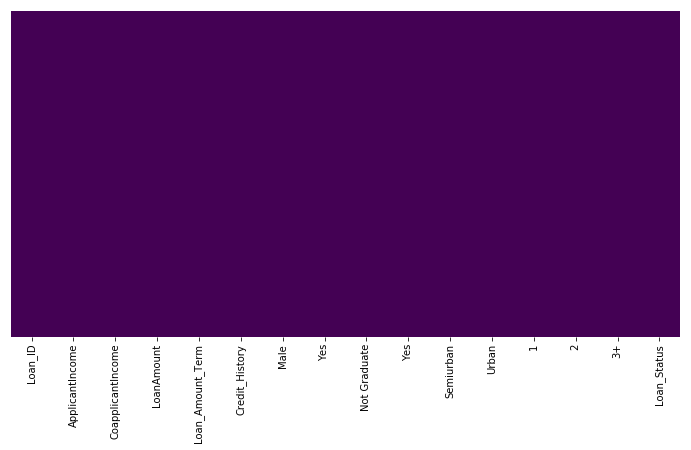

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [85]:
# Missing Data imputation for the Numerical Variable
median = test['LoanAmount'].median()
test['LoanAmount']  = test['LoanAmount'].replace(np.nan, median)

In [86]:
gender = pd.get_dummies(test['Gender'], drop_first=True)
married = pd.get_dummies(test['Married'], drop_first=True)
education = pd.get_dummies(test['Education'], drop_first=True)
self_employed = pd.get_dummies(test['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(test['Property_Area'], drop_first=True)
dependents = pd.get_dummies(test['Dependents'], drop_first=True)

In [87]:
test.drop(['Dependents','Gender','Married','Education','Self_Employed','Property_Area'],axis=1, inplace=True)

In [88]:
test = pd.concat([test,gender,married,education,self_employed,property_area,dependents], axis=1)

In [89]:
test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,1,2,3+
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,1,0,0,0
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1,1,0,0
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1,0,1,0
3,LP001035,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1,0,1,0
4,LP001051,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0,0,0


In [90]:
test2 = test.drop('Loan_ID', axis=1)

In [91]:
test['Loan_Status'] = logmodel.predict(test2)

In [92]:
test[['Loan_ID','Loan_Status']].head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [93]:
loan_map = {1:'Y',0:'N'}

In [94]:
test['Loan_Status'] = test['Loan_Status'].map(loan_map)

In [95]:
test.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban,1,2,3+,Loan_Status
0,LP001015,5720,0,110.0,360.0,1.0,1,1,0,0,0,1,0,0,0,Y
1,LP001022,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1,1,0,0,Y
2,LP001031,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1,0,1,0,Y
3,LP001035,2340,2546,100.0,360.0,1.0,1,1,0,0,0,1,0,1,0,Y
4,LP001051,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0,0,0,Y


In [96]:
final_df = test[['Loan_ID','Loan_Status']]

In [97]:
final_df.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [98]:
final_df.to_csv('Loan Prediction Submission', index=False)

In [99]:
# DONE